#INFO204 Assignment
---
*Jackson Kerr | 2942576*



##### Doc Options:

In [38]:
fast = True         # If true, uses cached graph images for speed
dataFromGit = True  # If true, automatically get the data from github repo

##Gettin That Data:
Let's start by importing the modified boston data.



In [39]:
import pandas as pd
import io
from google.colab import files

bost = pd.DataFrame()
if dataFromGit:
  url = "https://raw.githubusercontent.com/JacksonKerr/LinearRegression/main/modified_boston.csv"
  bost = pd.read_csv(url, index_col=0)
else:
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
  bost = pd.read_csv(io.BytesIO(uploaded['modified_boston.csv']), index_col=0)
bost

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,11.292897
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,15.113707
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,26.034624
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,29.201223
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,24.099477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,12.242679
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,17.066060
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,11.036473
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,13.672169


#### Description:

From [cs.toronto.edu](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

| Variable | Explaination|
|----------|-------------|
| CRIM     | per capita crime rate by town |
| ZN       | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS    | proportion of non-retail business acres per town. |
| CHAS     | Charles River dummy var (1 if tract bounds river; 0 otherwise) |
| NOX      | nitric oxides concentration (parts per 10 million) |
| RM       | average number of rooms per dwelling |
| AGE      | proportion of owner-occupied units built prior to 1940 |
| DIS      | weighted distances to five Boston employment centres |
| RAD      | index of accessibility to radial highways |
| TAX      | full-value property-tax rate per \$10,000 |
| PTRATIO  | pupil-teacher ratio by town |
| B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| LSTAT    | % lower status of the population |
| MEDV     | Median value of owner-occupied homes in $1000's |

Let's have a look at the fields.

In [40]:
bost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


Looks simple. No missing values. All float64 decimal numbers.

## Exploratory Data Analysis
Examining the obvious.



Let's look at the relationships between the variables using hue="chas" as it's the only categorical variable.

In [41]:
import seaborn as sns
import numpy as np
if fast:
  from IPython.display import Image
  from IPython.core.display import HTML 
  img = Image(url= "https://raw.githubusercontent.com/JacksonKerr/LinearRegression/main/resources/initial_pairplot.png")
else:
  img = sns.pairplot(bost, hue="chas")
img

### Upon Examination:
- There doesen't seem to be any meaningful grouping going on with the CHAS variable.
- There aren't any strong linear relationships between any of the variables.
- There appears to a non-linear relationship between:
  - RM and MEDV
  - LSTAT and MEDV
  - DIS and NOX
- Age does not seem to be correlated with MEDV

We will analyse these points one at a time.

#### 1. There doesen't seem to be any meaningful grouping going on with the CHAS variable.

This is good, it means this data is likely to work well with a single model. We don't need to 'break up' the problem depending on CHAS.

#### 2. There aren't any strong linear relationships between any of the variables.

Ideally at least one variable would have a strong relationship with the output but such is the way of life.


#### 3. There appears to be a non-linear relationship between:

##### 3a. RM and MEDV
The scatter plot of RM and MEDV shows somewhat of a non-linear relationship between them.
By transforming RM, we can create a new variable which more closely models a linear relationship.
We can now drop RM and use the new variable RM²




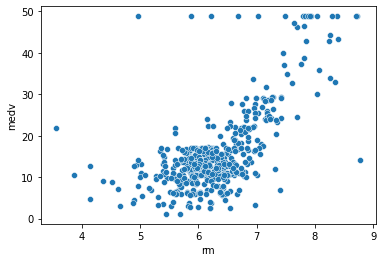

In [42]:
sns.scatterplot(x=bost["rm"], y=bost["medv"])

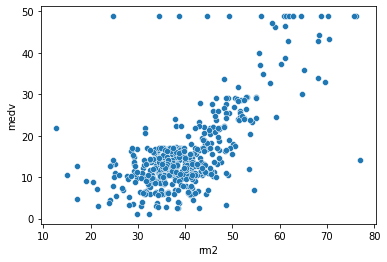

In [43]:
# Remove RM and replace with RM2 = RM²
if "rm" in bost.columns:
  bost.insert(2, "rm2", bost["rm"].copy()**2, True)
  bost = bost.drop(['rm'], axis=1)

sns.scatterplot(x=bost["rm2"], y=bost["medv"])

That looks a lot better.

##### 3b. LSAT and MEDV
Here we can repeat a similar process as for RM and MEDV


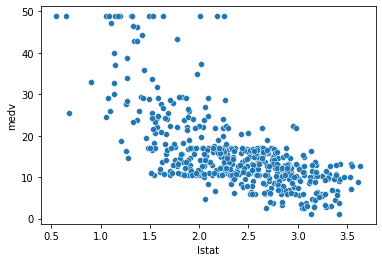

In [44]:
sns.scatterplot(x=np.log(bost["lstat"]), y=bost["medv"])

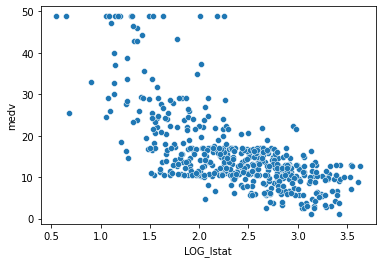

In [45]:
# Remove LSTAT and replace with LOG_LSTAT = ln(LSTAT)
if "lstat" in bost.columns:
  bost.insert(2, "LOG_lstat", np.log(bost["lstat"].copy()), True)
  bost = bost.drop(['lstat'], axis=1)

sns.scatterplot(x=bost["LOG_lstat"], y=bost["medv"])

##### 3c. DIS and NOX
As shown below, DIS and NOX are highly correlated when one of them is correctly scaled.

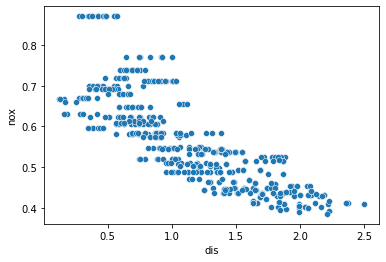

In [46]:
sns.scatterplot(x=np.log(bost["dis"]), y=bost["nox"])

If we examing the meaning of these variables we find:

| Variable | Explaination|
|----------|-------------|
| NOX | nitric oxides concentration (parts per 10 million)   |
| DIS | weighted distances to five Boston employment centres |

It's reasonable to assume that there will be a higher concentration of nitric oxides around employment centers as there is more likely to be chemical production which leads to its emission. [Source: EPA](https://www.epa.gov/ghgemissions/overview-greenhouse-gases#nitrous-oxide)

As these variables are essentially providing the same information, we should remove one of them.



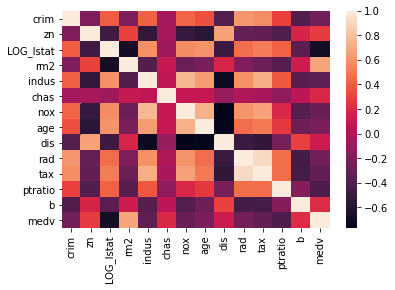

In [47]:
sns.heatmap(bost.corr())

Looking at the heatmap of correlations between the variables, it appears DIS has a stronger correlation with MEDV than NOX does. Therefore we should choose to remove NOX

In [48]:
if "nox" in bost.columns:
  bost = bost.drop(['nox'], axis=1)
bost

,crim,zn,LOG_lstat,rm2,indus,chas,age,dis,rad,tax,ptratio,b,medv
0,0.00632,18.0,1.605430,43.230625,2.31,0.0,65.2,4.0900,1.0,296.0,15.3,396.90,11.292897
1,0.02731,0.0,2.212660,41.229241,7.07,0.0,78.9,4.9671,2.0,242.0,17.8,396.90,15.113707
2,0.02729,0.0,1.393766,51.624225,7.07,0.0,61.1,4.9671,2.0,242.0,17.8,392.83,26.034624
3,0.03237,0.0,1.078410,48.972004,2.18,0.0,45.8,6.0622,3.0,222.0,18.7,394.63,29.201223
4,0.06905,0.0,1.673351,51.079609,2.18,0.0,54.2,6.0622,3.0,222.0,18.7,396.90,24.099477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,2.269028,43.467649,11.93,0.0,69.1,2.4786,1.0,273.0,21.0,391.99,12.242679
502,0.04527,0.0,2.206074,37.454400,11.93,0.0,76.7,2.2875,1.0,273.0,21.0,396.90,17.066060
503,0.06076,0.0,1.729884,48.664576,11.93,0.0,91.0,2.1675,1.0,273.0,21.0,396.90,11.036473
504,0.10959,0.0,1.868721,46.158436,11.93,0.0,89.3,2.3889,1.0,273.0,21.0,393.45,13.672169


#### 4. AGE doesen't seem to be correlated with MEDV.

Looking at the graph below, there seems to be no correlation between AGE and MEDV. This means we are free to remove AGE as it is not a good predictor for the outcome.

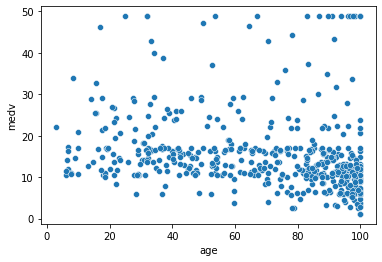

In [49]:
sns.scatterplot(x=bost["age"], y=bost["medv"]) 

In [50]:
# Remove AGE
if "age" in bost.columns:
  bost = bost.drop(['age'], axis=1)

#### Additionally, TAX and RAD seem to be highly correlated

Looking back at the heatmap, we can see that TAX and RAD seem to be highly correlated.

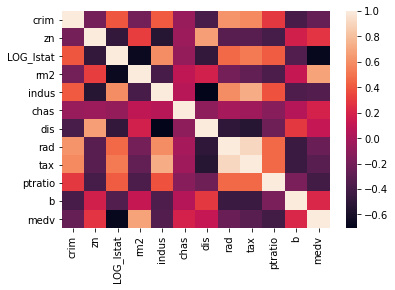

In [51]:
sns.heatmap(bost.corr())

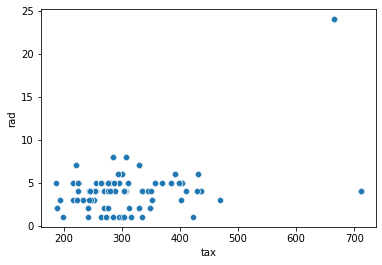

In [52]:
sns.scatterplot(x=bost["tax"], y=bost["rad"]) 

This means we are free to remove one of them. TAX looks like it has a slightly stronger correlation to MEDV as shown in the heatmap. Though it is very close. We will remove RAD in this case.

In [53]:
# Remove RAD
if "rad" in bost.columns:
  bost = bost.drop(['rad'], axis=1)

## Hyperparameter Analysis

### Helper functions from labs
```
def obtain_train_test_mse(mdl, hyperparameter_name, hyperparameter_values, X_train, y_train, X_test, y_test, runs=1)

def cross_validate_model_mse(mdl, param_grid, X, y, cv=None)
```



In [54]:
def obtain_train_test_mse(mdl, hyperparameter_name, hyperparameter_values, X_train, y_train, X_test, y_test, runs=1):
  from sklearn.metrics import mean_squared_error
  import pandas as pd

  # Start with an empty list
  res = []
  for i in range(runs):
    for val in hyperparameter_values:
      # call the set_params method of the mdl object, passing in a dictionary of the current parameter and value 
      # (in other words, execute: mdl.set_params(**{ hyperparameter_name : val })
      mdl.set_params(**{hyperparameter_name : val})
      # fit the model on X_train and y_train
      mdl.fit(X_train, y_train)

      test_mse = mean_squared_error(y_test, mdl.predict(X_test))
      train_mse = mean_squared_error(y_train, mdl.predict(X_train))

      res.append([val, train_mse, test_mse])

  colNames = [hyperparameter_name, 'train', 'test']
  return pd.DataFrame(res, columns=colNames)

def cross_validate_model_mse(mdl, param_grid, X, y, cv=None):
    import numpy as np
    import pandas as pd

    from sklearn.metrics import mean_squared_error, make_scorer
    from sklearn.model_selection import GridSearchCV
    
    # create a MSE scorer
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    
    # perform the grid search on the supplied data
    cv = GridSearchCV(mdl, param_grid, scoring=scorer, cv=cv)
    cv.fit(X, y)

    cv_stats = pd.DataFrame(cv.cv_results_).filter(regex='(param_.*)|(split.*_test_score)', axis=1)
    cv_stats = cv_stats.melt(id_vars=cv_stats.columns[cv_stats.columns.str.match('param_.*')], var_name='split', value_name='mse')
    cv_stats.rename(columns=lambda n: n.replace('param_', ''), inplace=True)
    cv_stats['split'] = cv_stats['split'].str.replace('split(\d+)_test_score', '\\1', regex=True).astype(np.int64)
    cv_stats['mse'] = -cv_stats['mse']
    
    return cv, cv_stats

### Tuning:

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Get train/test data
target = 'medv'
X = bost.drop(columns=[target]).to_numpy()
y = bost[target].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
                 

MSE:	 36.10419853308804
R²:	 0.6256321637478649


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RepeatedKFold
# 3 ROUNDS and 10 FOLDS
rkf = RepeatedKFold(n_splits=10, n_repeats=3)

dummy = DummyRegressor(strategy='mean')
dummy_grid = {} ## note: the dummy regressor has no real tunable hyperparameters, hence the empty dictionary

CART = DecisionTreeRegressor()
CART_grid = { 'min_samples_split' : [2, 5, 10, 20, 40, 80, 120, 360] }

zknn = Pipeline([ ('scale', StandardScaler()), ('knn', KNeighborsRegressor()) ])
zknn_grid = { 'knn__n_neighbors' : [1, 2, 5, 10, 20, 40, 80, 120] }

dummyCrossVal, dummy_stats = cross_validate_model_mse(dummy, dummy_grid, X_train, y_train, cv=rkf)

CART_train_test = obtain_train_test_mse(CART, 'min_samples_split', CART_grid['min_samples_split'], X_train, y_train, X_test, y_test)
CARTcv, CART_stats = cross_validate_model_mse(CART, CART_grid, X_train, y_train, cv=rkf)

knn_train_test = obtain_train_test_mse(zknn, 'knn__n_neighbors', zknn_grid['knn__n_neighbors'], X_train, y_train, X_test, y_test)
knncv, knn_stats = cross_validate_model_mse(zknn, zknn_grid, X_train, y_train, cv=rkf)

# Plotting

Dummy Regressor, mean CV MSE=87.21333803303439, test MSE=96.74167743039852
CART, best CV MSE=-37.39830639381333, test MSE=22.474165639807676
kNN, best CV MSE=-34.19255186905861, test MSE=29.513982883963326


Text(0.5, 1.0, 'kNN')

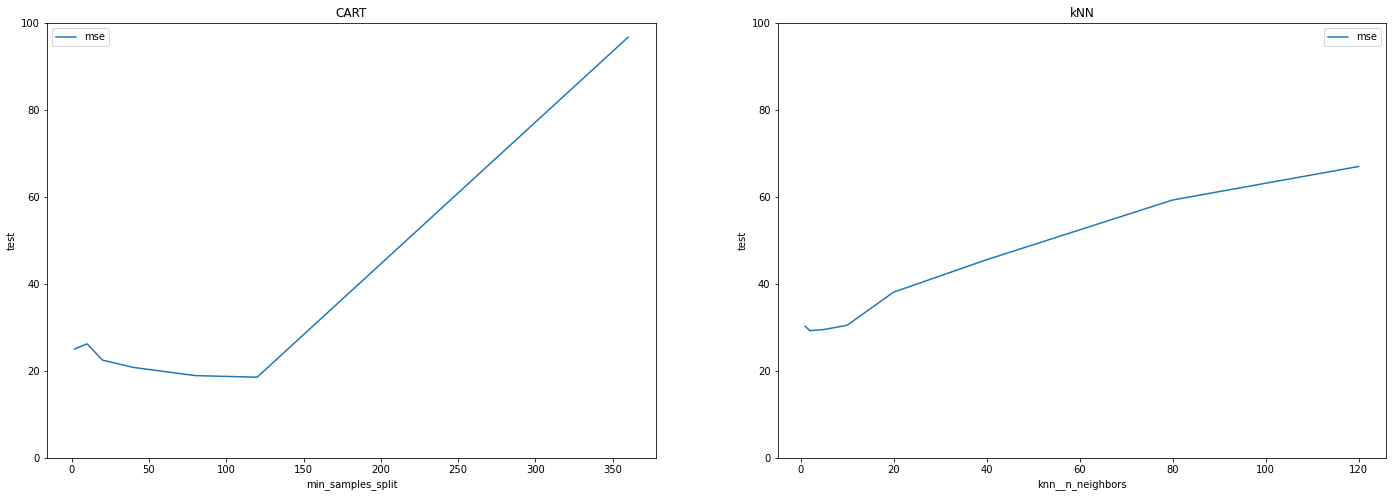

In [59]:
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

print("Dummy Regressor, mean CV MSE={}, test MSE={}".format(dummy_stats['mse'].mean(), mean_squared_error(y_test, dummyCrossVal.predict(X_test))))
print("CART, best CV MSE={}, test MSE={}".format(CARTcv.best_score_, mean_squared_error(y_test, CARTcv.predict(X_test))))
print("kNN, best CV MSE={}, test MSE={}".format(knncv.best_score_, mean_squared_error(y_test, knncv.predict(X_test))))

# 2 Plots side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24,8))

# CART plot
sns.lineplot(data=CART_train_test, x='min_samples_split', y='test', label='mse', ax=axs[0])
axs[0].set_ylim((0, 100))
axs[0].set_title('CART')

# kNN plot
sns.lineplot(data=knn_train_test, x='knn__n_neighbors', y='test', label='mse', ax=axs[1])
axs[1].set_ylim((0, 100))
axs[1].set_title('kNN')


# Linear Regression

In [ ]:
mdl = LinearRegression()
mdl.fit(X_train, y_train)

print("MSE:\t", mean_squared_error(y_test, mdl.predict(X_test)))
print("R²:\t", r2_score(y_test, mdl.predict(X_test)))

# TODO
- Standardisation for kNN
- Compare other modeld to linear regression
 - use cross validation (3 rounds of k folds)
 - use both original data and EDA data
 - plot findings in easy to understand graphics
- Knowledge generation
 - generate CART decision tree and use it to learn about the data (see spec)